# Data Wrangling- WeRateDogs# 
### by Roberto Soriano ###

In this project we given a dataset containing raw data extracted from the WeRateDogs Twitter archive. The dataset included Tweet-IDs and tweet-content infomration, but it was untidy and not ready to be used to analysis and gaining accurate insights.

Our job was to use the Tweet-IDs to query the Twitter’s API and gather all of the archive's original tweet JSON data. We took this JSON data and used it to assess, clean and properly format the archive's dataset. As a result, we were able to successfully analyze the data and find insights. The final result is also used to make dog breed predictionsin Udacity's machine learning course.

- The analyses and visualizations are based on data that has been wrangled, assessed and cleaned and not the original, raw data.

We will hover over this dataset and disclose a couple fun insights about these dogs!

In [1]:
from IPython.display import HTML, Image
#Idea and code for this taken from "harshil", Stackoverflow
#https://stackoverflow.com/questions/27934885/how-to-hide-code-from-cells-in-ipython-notebook-visualized-with-nbviewer

button = HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="View code."></form>''')
button

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline 
import seaborn as sns


# The Data #

#### The original dataset ####

In [3]:
original= pd.read_csv('twitter-archive-enhanced.csv')
original.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


## After the following Wrangling! ##

### Quality Issues wrangled ###
- Remove Retweets and retweet columns
- Names column contains many incorrect values
- Remove tweets with no images
- Create column for dog stage and remove the individual variable columns
- Improve tweet sources by source category
- Remove unnecessary columns
- Set the correct dtype for each variable
- replace "& amp;" with "&"


### Tidiness issues wrangled ###

- Display full texts in dataframe columns 
- Join all three dataframes, the twitter archive, predictions and the tweet data.

#### The final result ####

In [4]:
master = pd.read_csv('twitter_archive_final.csv')
df = master.copy()

# Let's use the timestamp as our index
df.set_index('timestamp', inplace=True)


df.head()

,Unnamed: 0,tweet_id,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-08-01 16:23:56,0,892420643555336193,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,NaN,8395,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
2017-08-01 00:17:27,1,892177421306343426,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,NaN,6196,...,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2017-07-31 00:18:03,2,891815181378084864,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,NaN,4100,...,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2017-07-30 15:58:51,3,891689557279858688,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,NaN,8528,...,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2017-07-29 16:00:24,4,891327558926688256,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,NaN,9243,...,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


## Let's dive in! ## 

#### Tweet Sources ####

In [5]:
sources = df['source'].value_counts()
sources

Twitter for iPhone    1954
Twitter Web Client      28
TweetDeck               11
Name: source, dtype: int64

#### It is almost certain Matt Nelson, the WeRateDogs founder, has an Iphone! The vast majority of tweet came from Twitter for Iphone.####

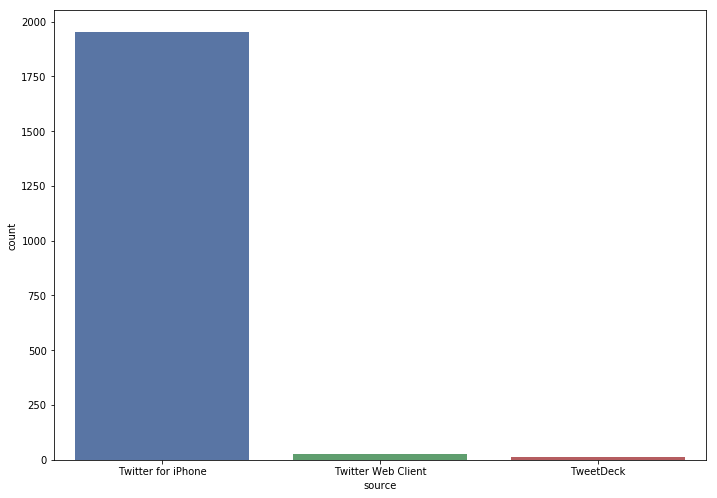

In [6]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.set(style="darkgrid")

ax = sns.countplot(x="source", data=df)

## Meet Phineas! the first dog on our dataset. ##

In [7]:
Image(url= "https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg")

#### There is a clear and logical correlation between the number of times a tweet is marked as "favorite" and the times it's retweeted! ####

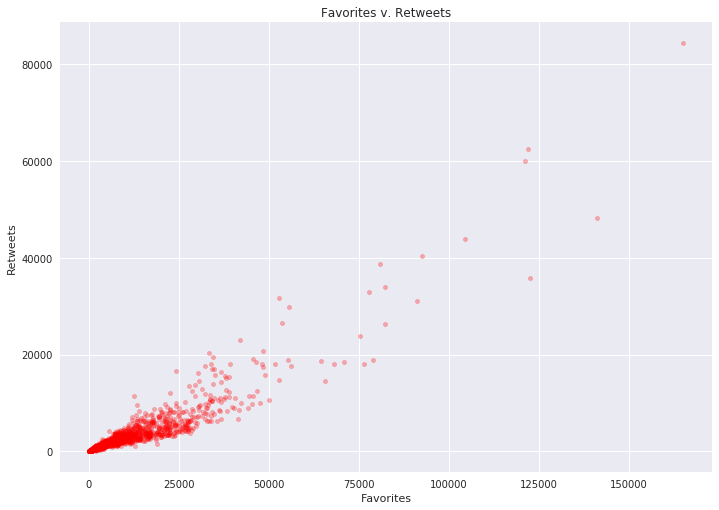

In [8]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

df.plot(kind = 'scatter', x = 'favorite_count', y = 'retweet_count', alpha = 0.3, color = 'red', figsize=(10,5), legend= True, subplots=True, ax=ax);
plt.xlabel('Favorites');
plt.ylabel('Retweets');
plt.title('Favorites v. Retweets');

#### Turns out 'Pupper' is the most common dog_stage. ####

In [9]:
stages = df['dog_stage'].value_counts()
stages

pupper     223
doggo       72
puppo       28
floofer      3
Name: dog_stage, dtype: int64

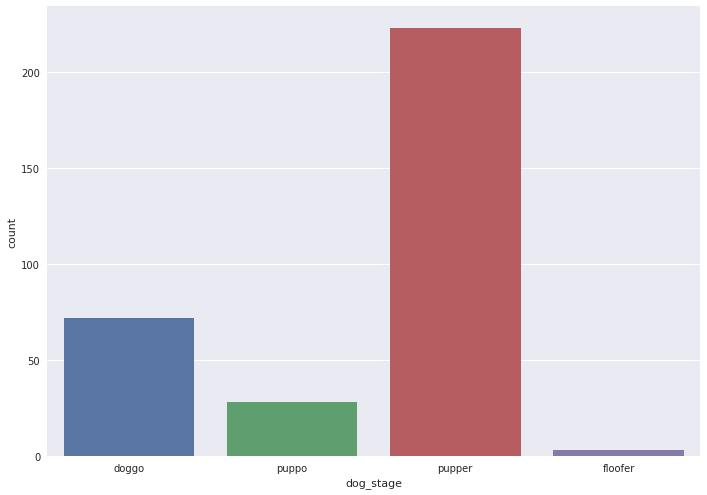

In [10]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)



sns.set(style="darkgrid")
ax = sns.countplot(x="dog_stage", data=df)

### What does a pupper look like?###

In [11]:
#To se all Puppers
#df[df['dog_stage']=='pupper']

### aww! ###

In [12]:
# Image of the first tweet-ID, https://twitter.com/dog_rates/status/886366144734445568
Image(url="https://pbs.twimg.com/media/DE0BTnQUwAApKEH.jpg")

### It is very obvious that golden retrievers are the most popular predictions, but some of the other competitors are very interesting. ###
#### I have verified many of these predictions myself. Amazingly, they get it right every time! ####

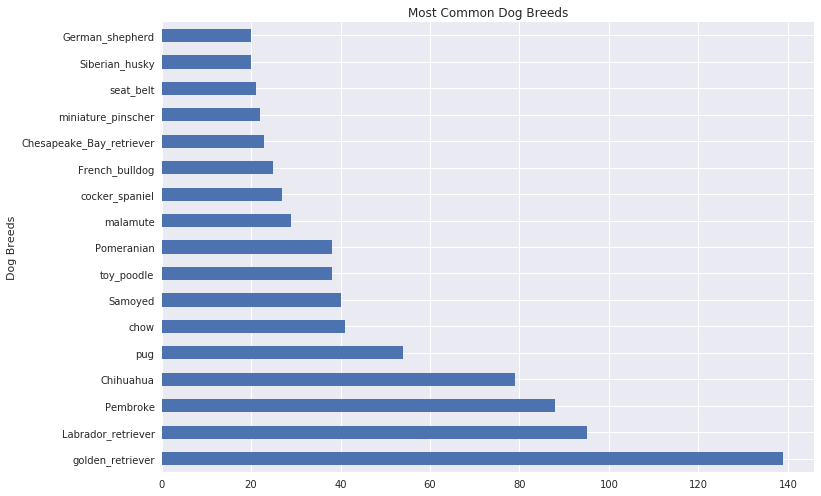

In [13]:
df_breed = df.groupby('p1').filter(lambda x: len(x) >= 20)

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

df_breed['p1'].value_counts().plot(kind = 'barh', ax=ax);
plt.title('Most Common Dog Breeds')
#plt.xlabel('')
plt.ylabel('Dog Breeds');

## Lets give these predictions some order and color! ##

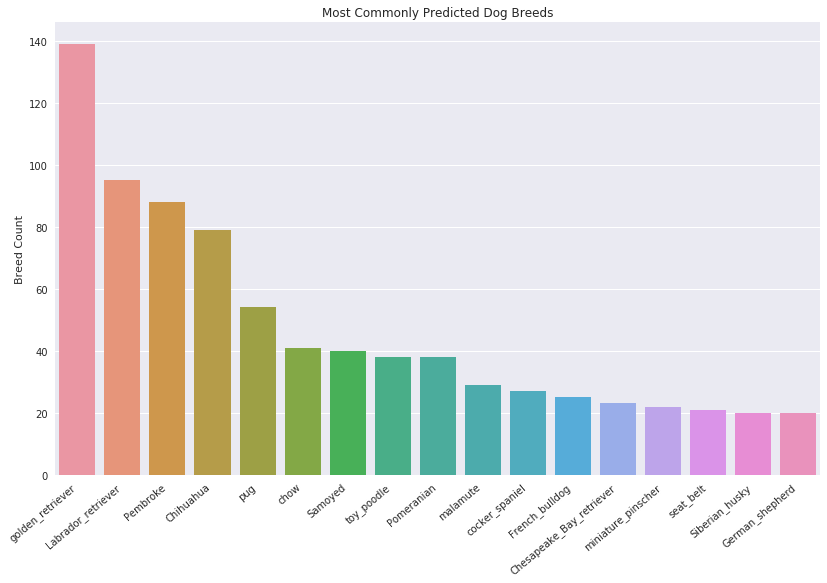

In [14]:
df_breed2 = df.groupby('p1').filter(lambda x: len(x) >= 20)

fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

sns.set(style="darkgrid")
ax = sns.countplot(x="p1", data=df_breed2, linewidth=50, order = df_breed['p1'].value_counts().index, ax=ax)
ax.set(xlabel='', ylabel='Breed Count', title='Most Commonly Predicted Dog Breeds');
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right");
plt.tight_layout();